## Objective

#### The goal of this data analysis project is to analyze student performance based on several factors and identify those factors that significantly impact performance. We aim to eliminate or reduce the negative impact of these factors to improve overall student performance

#### Import libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

### Data Collection

In [3]:
df = pd.read_csv("D:/New folder (3)/student_data.csv")
print(df.head(4))

   Unnamed: 0  Gender EthnicGroup          ParentEduc     LunchType TestPrep  \
0           0  female         NaN   bachelor's degree      standard     none   
1           1  female     group C        some college      standard      NaN   
2           2  female     group B     master's degree      standard     none   
3           3    male     group A  associate's degree  free/reduced     none   

  ParentMaritalStatus PracticeSport IsFirstChild  NrSiblings TransportMeans  \
0             married     regularly          yes         3.0     school_bus   
1             married     sometimes          yes         0.0            NaN   
2              single     sometimes          yes         4.0     school_bus   
3             married         never           no         1.0            NaN   

  WklyStudyHours  MathScore  ReadingScore  WritingScore  
0            < 5         71            71            74  
1         5 - 10         69            90            88  
2            < 5         87  

## Finding information of the data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           30641 non-null  int64  
 1   Gender               30641 non-null  object 
 2   EthnicGroup          28801 non-null  object 
 3   ParentEduc           28796 non-null  object 
 4   LunchType            30641 non-null  object 
 5   TestPrep             28811 non-null  object 
 6   ParentMaritalStatus  29451 non-null  object 
 7   PracticeSport        30010 non-null  object 
 8   IsFirstChild         29737 non-null  object 
 9   NrSiblings           29069 non-null  float64
 10  TransportMeans       27507 non-null  object 
 11  WklyStudyHours       29686 non-null  object 
 12  MathScore            30641 non-null  int64  
 13  ReadingScore         30641 non-null  int64  
 14  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(4), object(10)


## Finding Important values from the data

In [5]:
df.describe()

,Unnamed: 0,NrSiblings,MathScore,ReadingScore,WritingScore
count,30641.000000,29069.000000,30641.000000,30641.000000,30641.000000
mean,499.556607,2.145894,66.558402,69.377533,68.418622
std,288.747894,1.458242,15.361616,14.758952,15.443525
min,0.000000,0.000000,0.000000,10.000000,4.000000
25%,249.000000,1.000000,56.000000,59.000000,58.000000
50%,500.000000,2.000000,67.000000,70.000000,69.000000
75%,750.000000,3.000000,78.000000,80.000000,79.000000
max,999.000000,7.000000,100.000000,100.000000,100.000000


# Finding Null values

In [93]:
df.isnull().sum()

Gender                    0
EthnicGroup            1840
ParentEduc             1845
LunchType                 0
TestPrep               1830
ParentMaritalStatus    1190
PracticeSport           631
IsFirstChild            904
NrSiblings                0
TransportMeans         3134
WklyStudyHours          955
MathScore                 0
ReadingScore              0
WritingScore              0
dtype: int64

### Fill only important missing values

In [92]:
df['NrSiblings'].fillna(df['NrSiblings'].mean(), inplace=True)

## Drop Unnamed column from the data

In [7]:
df = df.drop("Unnamed: 0", axis=1)

print(df.head(10))

   Gender EthnicGroup          ParentEduc     LunchType   TestPrep  \
0  female         NaN   bachelor's degree      standard       none   
1  female     group C        some college      standard        NaN   
2  female     group B     master's degree      standard       none   
3    male     group A  associate's degree  free/reduced       none   
4    male     group C        some college      standard       none   
5  female     group B  associate's degree      standard       none   
6  female     group B        some college      standard  completed   
7    male     group B        some college  free/reduced       none   
8    male     group D         high school  free/reduced  completed   
9  female     group B         high school  free/reduced       none   

  ParentMaritalStatus PracticeSport IsFirstChild  NrSiblings TransportMeans  \
0             married     regularly          yes         3.0     school_bus   
1             married     sometimes          yes         0.0           

# Gender distribution

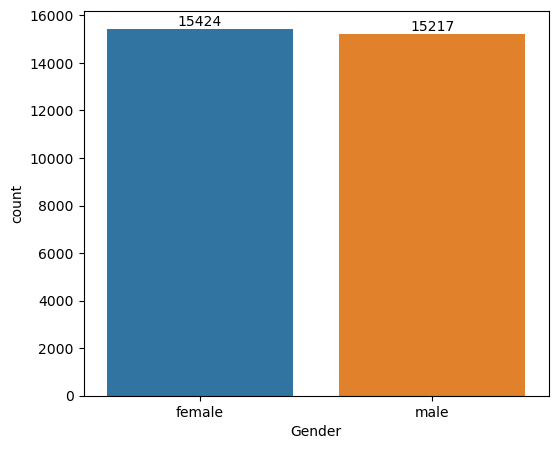

In [8]:
plt.figure(figsize=(6, 5))
a=sns.countplot( x= "Gender" , data = df)
a.bar_label(a.containers[0])
plt.show()

## Parents education effect on child education

In [9]:
gp = df.groupby("ParentEduc").agg({"MathScore" : 'mean' , "ReadingScore" : "mean" , "WritingScore" : 'mean'})
print(gp)

                    MathScore  ReadingScore  WritingScore
ParentEduc                                               
associate's degree  68.365586     71.124324     70.299099
bachelor's degree   70.466627     73.062020     73.331069
high school         64.435731     67.213997     65.421136
master's degree     72.336134     75.832921     76.356896
some college        66.390472     69.179708     68.501432
some high school    62.584013     65.510785     63.632409


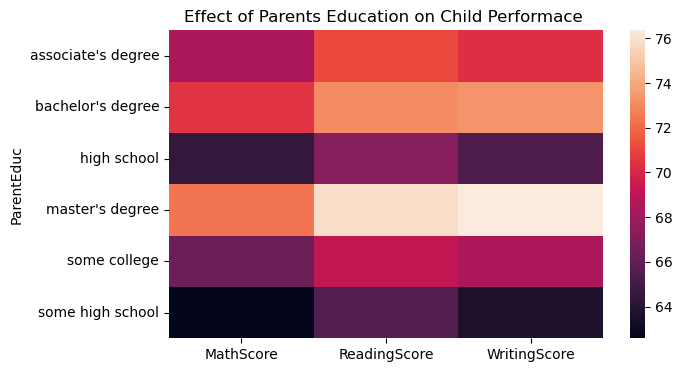

In [43]:
plt.figure(figsize=(7, 4))
sns.heatmap(gp, annot=False)
plt.title("Effect of Parents Education on Child Performace ")
plt.show()

## Finding the students performance based on their parents marital status

In [17]:
gp1=df.groupby("ParentMaritalStatus").agg({"MathScore":'mean', "ReadingScore":'mean',"WritingScore":'mean'})
print(gp1)

                     MathScore  ReadingScore  WritingScore
ParentMaritalStatus                                       
divorced             66.691197     69.655011     68.799146
married              66.657326     69.389575     68.420981
single               66.165704     69.157250     68.174440
widowed              67.368866     69.651438     68.563452


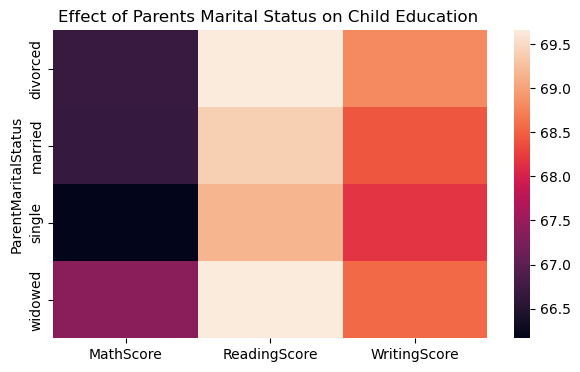

In [41]:
plt.figure(figsize=(7, 4))
sns.heatmap(gp1, annot = False)
plt.title("Effect of Parents Marital Status on Child Education ")
plt.show()

## Finding the students performance based on their sports Activity

In [35]:
gp2 = df.groupby("PracticeSport").agg({"MathScore" : 'mean' , "ReadingScore" : "mean" , "WritingScore" : 'mean'})
print(gp2)

               MathScore  ReadingScore  WritingScore
PracticeSport                                       
never          64.171079     68.337662     66.522727
regularly      67.839155     69.943019     69.604003
sometimes      66.274831     69.241307     68.072438


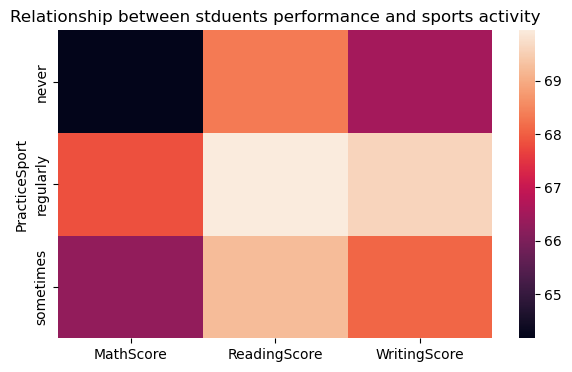

In [42]:
plt.figure(figsize= (7, 4))
sns.heatmap(gp2, annot = False)
plt.title("Relationship between stduents performance and sports activity")
plt.show()

## Finding the students performance in each subjects based on Gender

In [95]:
gp2 = df.groupby("Gender").agg({"MathScore" : 'mean' , "ReadingScore" : "mean" , "WritingScore" : 'mean'})
print(gp2)

        MathScore  ReadingScore  WritingScore
Gender                                       
female  64.080654     72.853216     72.856457
male    69.069856     65.854571     63.920418


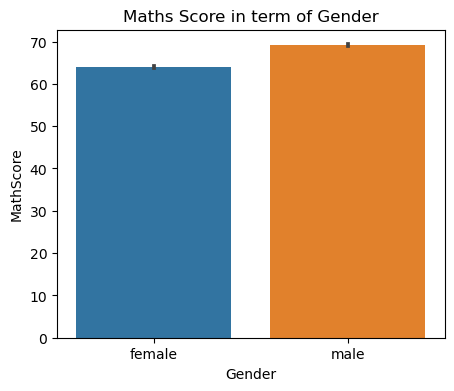

In [64]:
plt.figure(figsize = (5, 4))
sns.barplot(y="MathScore",x = "Gender", data = df )
plt.title("Maths Score in term of Gender")
plt.show()

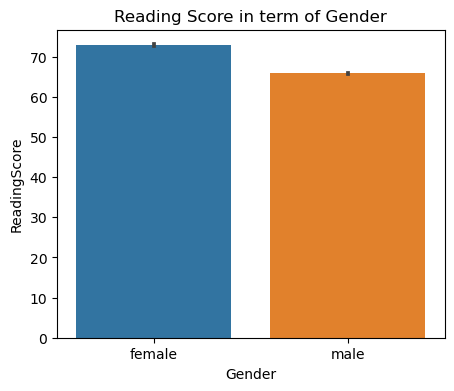

In [65]:
plt.figure(figsize = (5, 4))
sns.barplot(y="ReadingScore", x = "Gender", data = df )
plt.title("Reading Score in term of Gender")
plt.show()

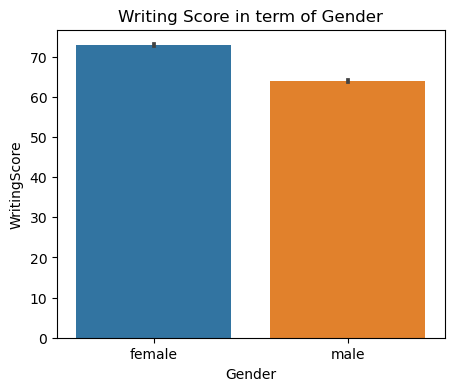

In [67]:
plt.figure(figsize = (5, 4))
sns.barplot(y="WritingScore",x= "Gender", data = df )
plt.title("Writing Score in term of Gender")
plt.show()

In [94]:
gp3 = df.groupby("TestPrep").agg({"MathScore" : 'mean' , "ReadingScore" : "mean" , "WritingScore" : 'mean'})
print(gp3)

           MathScore  ReadingScore  WritingScore
TestPrep                                        
completed   69.54666     73.732998     74.703265
none        64.94877     67.051071     65.092756


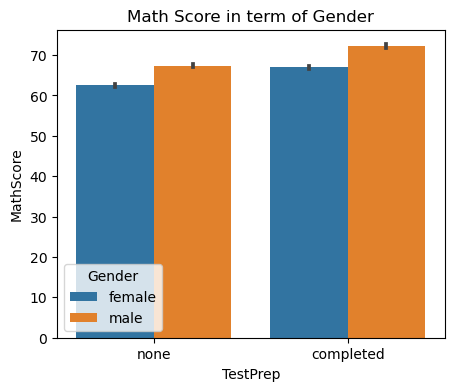

In [84]:
plt.figure(figsize = (5, 4))
sns.barplot(y="MathScore", x= "TestPrep", hue = "Gender", data = df )
plt.title("Math Score in term of Gender")
plt.show()

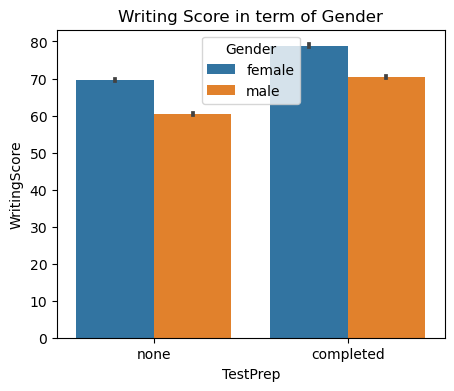

In [85]:
plt.figure(figsize = (5, 4))
sns.barplot(y="WritingScore", x= "TestPrep", hue = "Gender", data = df )
plt.title("Writing Score in term of Gender")
plt.show()

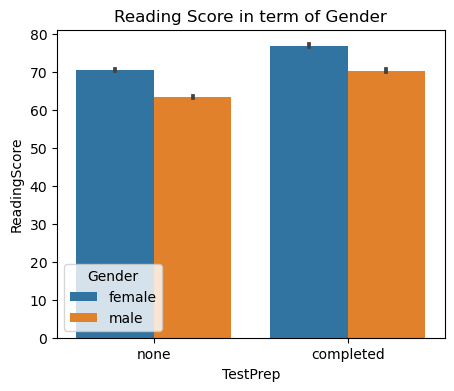

In [86]:
plt.figure(figsize = (5, 4))
sns.barplot(y="ReadingScore", x= "TestPrep", hue = "Gender", data = df )
plt.title("Reading Score in term of Gender")
plt.show()

### Number of siblings effect on the performance of students

In [97]:
gp4 = df.groupby("NrSiblings").agg({"MathScore" : 'mean' , "ReadingScore" : "mean" , "WritingScore" : 'mean'})
print(gp4)

            MathScore  ReadingScore  WritingScore
NrSiblings                                       
0.000000    66.819449     69.547812     68.746515
1.000000    66.473896     69.259097     68.245345
2.000000    66.554934     69.472018     68.522533
2.145894    66.329517     69.223282     68.090967
3.000000    66.719092     69.488159     68.650498
4.000000    66.245495     69.144169     68.073444
5.000000    66.630303     69.453788     68.282576
6.000000    65.917219     68.801325     67.860927
7.000000    67.615120     69.828179     68.986254


In [98]:
### The result show negligable impact of No of sibilings 

###  Finding the Average score of stduents for each subject based on their weekly study hours

In [99]:
gp4 = df.groupby("WklyStudyHours").agg({"MathScore" : 'mean' , "ReadingScore" : "mean" , "WritingScore" : 'mean'})
print(gp4)

                MathScore  ReadingScore  WritingScore
WklyStudyHours                                       
5 - 10          66.870491     69.660532     68.636280
< 5             64.580359     68.176135     67.090192
> 10            68.696655     70.365436     69.777778


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


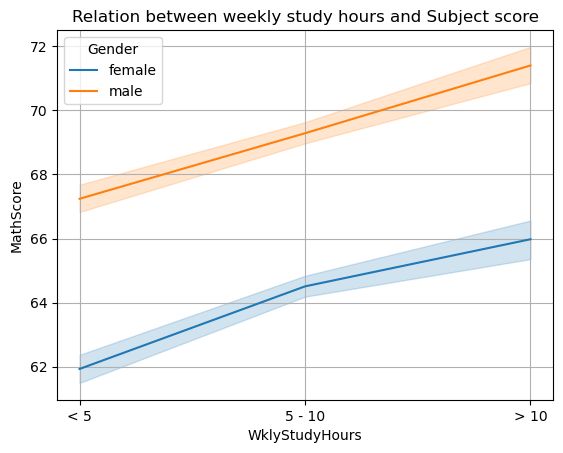

In [111]:
sns.lineplot(x= "WklyStudyHours", y = "MathScore", data = df, hue ="Gender")
plt.grid()
plt.title("Relation between weekly study hours and Subject score")
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


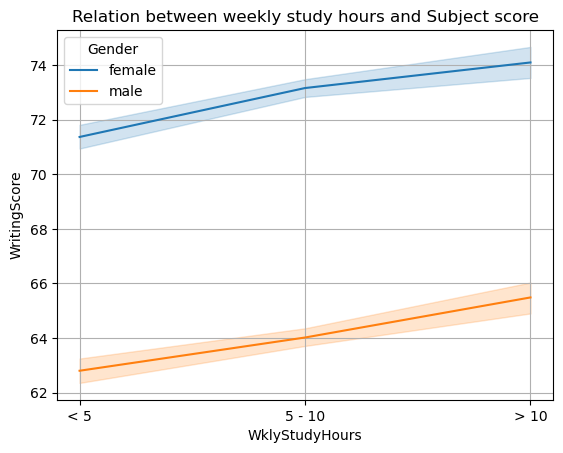

In [110]:
sns.lineplot(x= "WklyStudyHours", y = "WritingScore", data = df, hue ="Gender")
plt.grid()
plt.title("Relation between weekly study hours and Subject score")
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


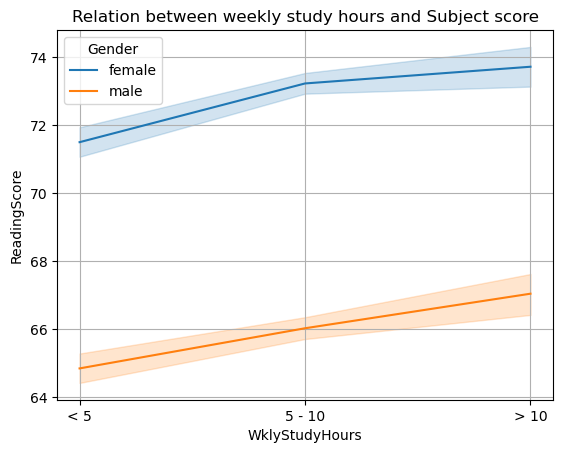

In [109]:
sns.lineplot(x= "WklyStudyHours", y = "ReadingScore", data = df, hue ="Gender")
plt.grid()
plt.title("Relation between weekly study hours and Subject score")
plt.show()

# Conclusion

### In our comprehensive data analysis, we have effectively summarized student performance alongside the factors influencing it. Through rigorous examination, we identified key factors significantly impacting student outcomes, while also discerning several initially perceived as influential but found to have negligible effect upon detailed analysis. Armed with these insights, informed decisions can be made to strategically enhance student performance by prioritizing interventions targeted at the most impactful factors identified through our data-driven approach.